<a href="https://colab.research.google.com/github/anusha-buchipalli/-Flight-Delay-Prediction-using-Big-Data-Machine-Learning-/blob/main/final_bdt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load dataset
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

In [ ]:
# Select features and target variable
features = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
            'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
            'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
target = 'arr_del15'

In [ ]:
# Drop missing values to ensure clean data
data = data.dropna()
X = data[features]
y = (data[target] > 0).astype(int)  # Binary classification: delayed (1) or not (0)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train SVM with class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# Predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Display metrics and confusion matrix
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Accuracy: 0.98
F1 Score: 0.99
Recall: 0.98
Precision: 1.00

Confusion Matrix:
[[ 1335     0]
 [  751 32159]]


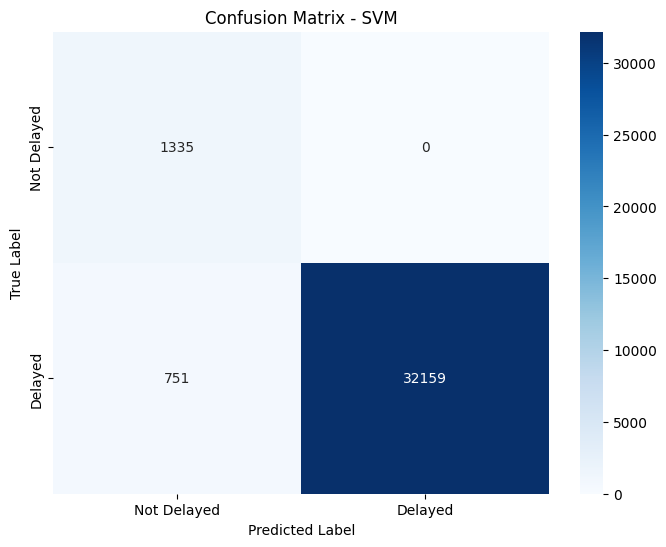

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed',
'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
feature_indices = [0, 1]  # Select two features for visualization
X_vis = X_train_scaled[:, feature_indices]
svm_model_vis = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model_vis.fit(X_vis, y_train)

In [ ]:
# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
# Predict on the mesh grid
Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

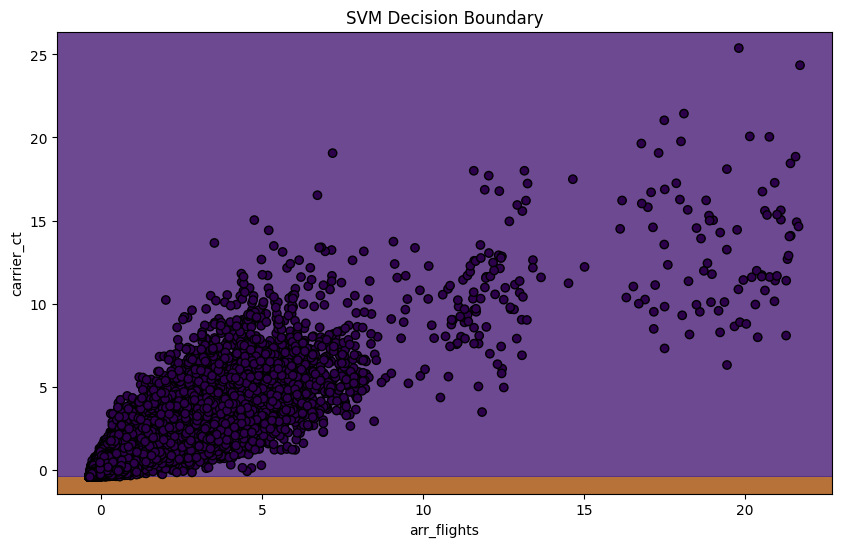

In [ ]:
# Plot SVM decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.PuOr)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.PuOr)
plt.title('SVM Decision Boundary')
plt.xlabel(features[feature_indices[0]])
plt.ylabel(features[feature_indices[1]])
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Load dataset
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

In [ ]:
# Select features and target variable
features = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
            'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
            'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
target = 'arr_del15'

In [ ]:
# Drop missing values to ensure clean data
data = data.dropna()
X = data[features]
y = (data[target] > 0).astype(int)  # Binary classification: delayed (1) or not (0)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression with class weights
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Display metrics and confusion matrix
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Accuracy: 0.95
F1 Score: 0.97
Recall: 0.94
Precision: 1.00

Confusion Matrix:
[[ 1335     0]
 [ 1859 31051]]


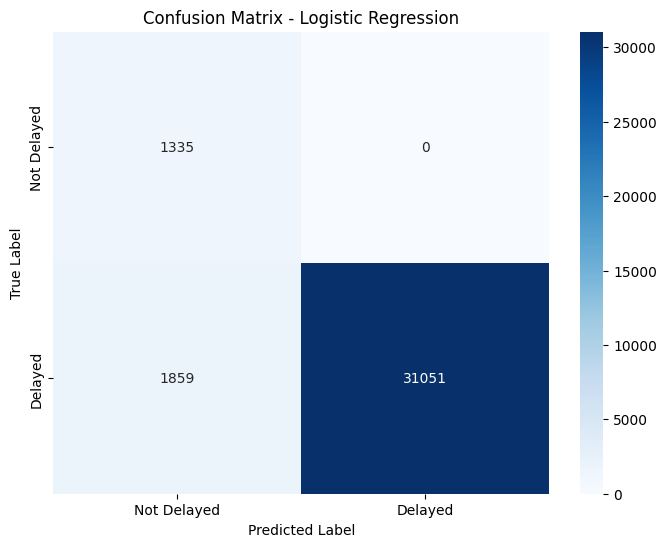

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed',
'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
feature_indices = [3, 4]  # Select features 3 and 4 for visualization
X_vis = X_train_scaled[:, feature_indices]
log_reg_model_vis = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_model_vis.fit(X_vis, y_train)

In [ ]:
# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
# Predict on the mesh grid
Z = log_reg_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

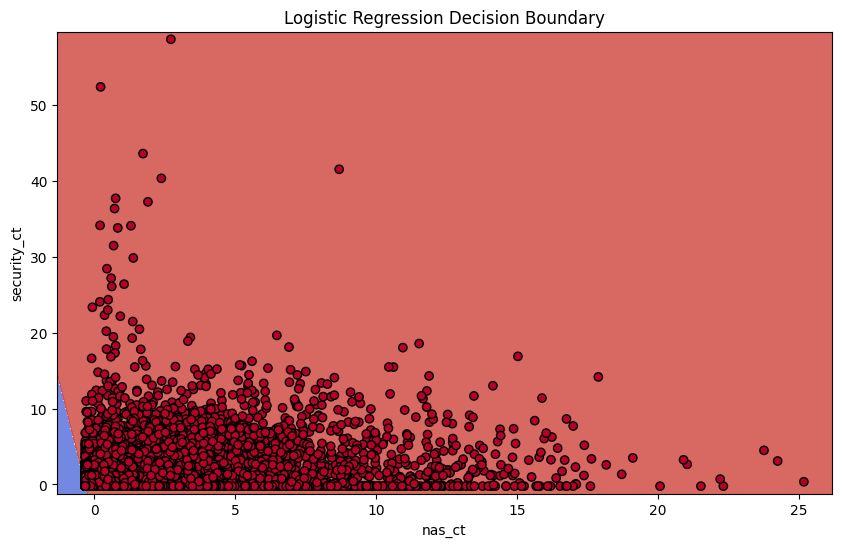

In [ ]:
# Plot Logistic Regression decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel(features[feature_indices[0]])
plt.ylabel(features[feature_indices[1]])
plt.show()

In [ ]:
!pip install --upgrade lightgbm
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Load dataset
df = pd.read_csv("/content/Airline_Delay_Cause.csv")

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Define target variable (Binary classification: 1 if delay > 15 min, else 0)
df['delay_label'] = (df['arr_del15'] > 15).astype(int)

In [ ]:
# Drop non-relevant or redundant columns
drop_cols = ['arr_del15', 'arr_delay', 'carrier_name', 'airport_name']
df.drop(columns=drop_cols, inplace=True)

In [ ]:
# Identify categorical and numerical columns
cat_cols = ['carrier', 'airport']  # Categorical features
num_cols = [col for col in df.columns if col not in cat_cols + ['delay_label']]

In [ ]:
# Convert categorical variables to category type
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
# Split data into train and test sets
X = df.drop(columns=['delay_label'])
y = df['delay_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define LightGBM datasets
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)
lgb_test = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_cols, reference=lgb_train)

In [ ]:
# LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',  # Ensures early stopping compatibility
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 1  # Enables training logs
}

In [ ]:
# Train LightGBM model
evals_result = {}  # Stores loss values for plotting
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_test],
    valid_names=['valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
        lgb.record_evaluation(evals_result)  # Records loss values
    ]
    )

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 72703, number of negative: 64275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3531
[LightGBM] [Info] Number of data points in the train set: 136978, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530764 -> initscore=0.123212
[LightGBM] [Info] Start training from score 0.123212
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.0237956


In [ ]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

In [ ]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9967878522412031

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16089
           1       1.00      1.00      1.00     18156

    accuracy                           1.00     34245
   macro avg       1.00      1.00      1.00     34245
weighted avg       1.00      1.00      1.00     34245



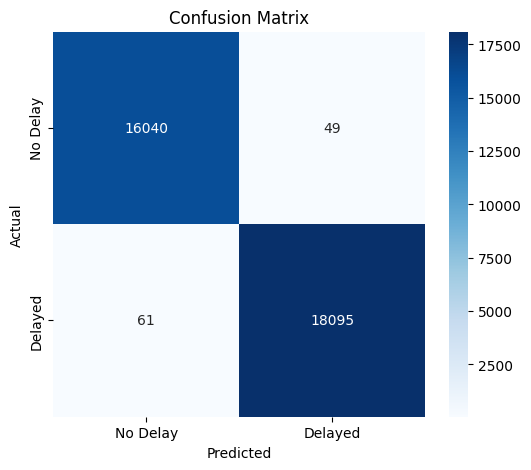

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delayed'], yticklabels=['No Delay', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

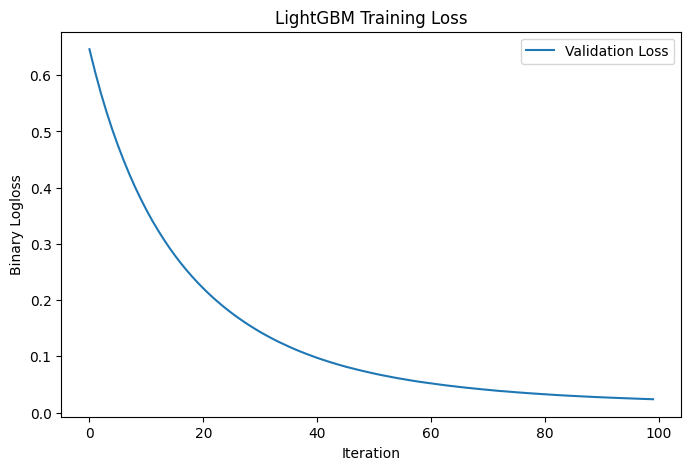

In [ ]:
# Plot Training Loss (Binary Logloss)
plt.figure(figsize=(8, 5))
plt.plot(evals_result['valid']['binary_logloss'], label="Validation Loss")
plt.xlabel('Iteration')
plt.ylabel('Binary Logloss')
plt.title('LightGBM Training Loss')
plt.legend()
plt.show()

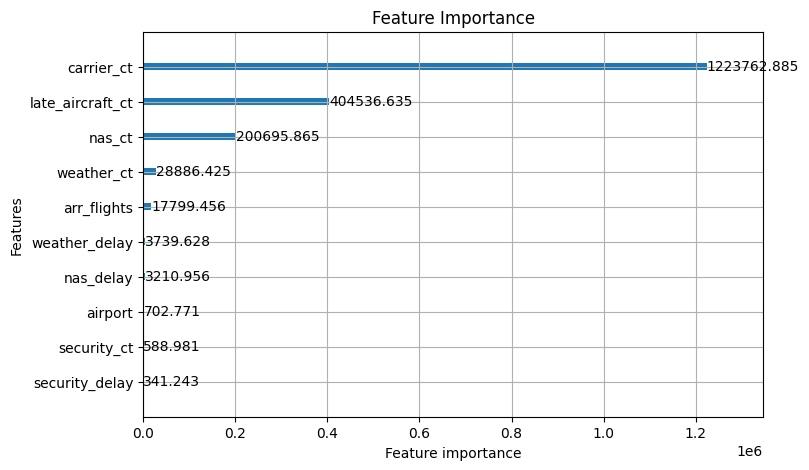

In [ ]:
# Feature Importance Plot
lgb.plot_importance(model, max_num_features=10, importance_type="gain", figsize=(8, 5))
plt.title("Feature Importance")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Load dataset
df = pd.read_csv("/content/Airline_Delay_Cause.csv")

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Define target variable (Binary classification: 1 if delay > 15 min, else 0)
df['delay_label'] = (df['arr_del15'] > 15).astype(int)

In [ ]:
# Drop non-relevant or redundant columns
drop_cols = ['arr_del15', 'arr_delay', 'carrier_name', 'airport_name']
df.drop(columns=drop_cols, inplace=True)

In [ ]:
# Identify categorical and numerical columns
cat_cols = ['carrier', 'airport']  # Categorical features
num_cols = [col for col in df.columns if col not in cat_cols + ['delay_label']]

In [ ]:
# Convert categorical variables using one-hot encoding (since XGBoost does not handle categorical data directly)
df = pd.get_dummies(df, columns=cat_cols)

In [ ]:
# Split data into train and test sets
X = df.drop(columns=['delay_label'])
y = df['delay_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# XGBoost Parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Similar to binary_logloss in LightGBM
    'eta': 0.05,  # Learning rate
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

In [ ]:
# Train XGBoost model with early stopping
evals_result = {}  # Store loss values
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'valid')],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=True
)

[0]	valid-logloss:0.64966
[1]	valid-logloss:0.61232
[2]	valid-logloss:0.57821
[3]	valid-logloss:0.54305
[4]	valid-logloss:0.51303
[5]	valid-logloss:0.48552
[6]	valid-logloss:0.46002
[7]	valid-logloss:0.43740
[8]	valid-logloss:0.41420
[9]	valid-logloss:0.39174
[10]	valid-logloss:0.37091
[11]	valid-logloss:0.35227
[12]	valid-logloss:0.33414
[13]	valid-logloss:0.31869
[14]	valid-logloss:0.30429
[15]	valid-logloss:0.29084
[16]	valid-logloss:0.27823
[17]	valid-logloss:0.26479
[18]	valid-logloss:0.25219
[19]	valid-logloss:0.24089
[20]	valid-logloss:0.23167
[21]	valid-logloss:0.22105
[22]	valid-logloss:0.21231
[23]	valid-logloss:0.20281
[24]	valid-logloss:0.19385
[25]	valid-logloss:0.18538
[26]	valid-logloss:0.17872
[27]	valid-logloss:0.17108
[28]	valid-logloss:0.16383
[29]	valid-logloss:0.15701
[30]	valid-logloss:0.15051
[31]	valid-logloss:0.14444
[32]	valid-logloss:0.13892
[33]	valid-logloss:0.13340
[34]	valid-logloss:0.12903
[35]	valid-logloss:0.12405
[36]	valid-logloss:0.11956
[37]	valid-

In [ ]:
# Predictions
y_pred = (model.predict(dtest) > 0.5).astype(int)

In [ ]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999299167761717

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16089
           1       1.00      1.00      1.00     18156

    accuracy                           1.00     34245
   macro avg       1.00      1.00      1.00     34245
weighted avg       1.00      1.00      1.00     34245



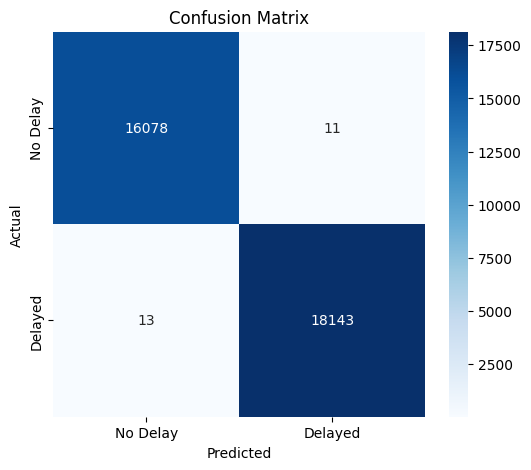

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delayed'], yticklabels=['No Delay', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

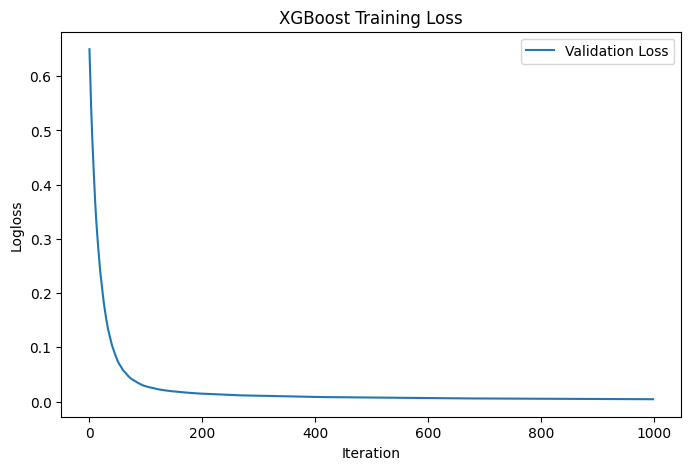

In [ ]:
# Plot Training Loss (Logloss)
plt.figure(figsize=(8, 5))
plt.plot(evals_result['valid']['logloss'], label="Validation Loss")
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('XGBoost Training Loss')
plt.legend()
plt.show()

<Figure size 800x500 with 0 Axes>

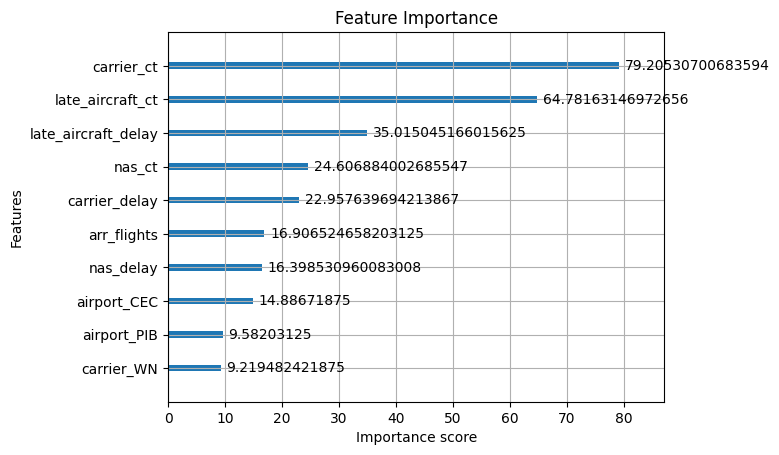

In [ ]:
# Feature Importance Plot
plt.figure(figsize=(8, 5))  # Set figure size before calling the function
xgb.plot_importance(model, max_num_features=10, importance_type="gain")
plt.title("Feature Importance")
plt.show()

In [ ]:
!pip install catboost
import catboost as cb
print(cb.__version__)
import pandas as pd
import numpy as np
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
1.2.8


In [ ]:
# Load dataset
df = pd.read_csv("/content/Airline_Delay_Cause.csv")

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Define target variable (Binary classification: 1 if delay > 15 min, else 0)
df['delay_label'] = (df['arr_del15'] > 15).astype(int)

In [ ]:
# Drop non-relevant or redundant columns
drop_cols = ['arr_del15', 'arr_delay', 'carrier_name', 'airport_name']
df.drop(columns=drop_cols, inplace=True)

In [ ]:
# Identify categorical and numerical columns
cat_cols = ['carrier', 'airport']  # Categorical features
num_cols = [col for col in df.columns if col not in cat_cols + ['delay_label']]

In [ ]:
# Convert categorical columns to string (CatBoost handles categorical features natively)
df[cat_cols] = df[cat_cols].astype(str)

In [ ]:
# Split data into train and test sets
X = df.drop(columns=['delay_label'])
y = df['delay_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define CatBoost datasets
train_pool = cb.Pool(X_train, label=y_train, cat_features=cat_cols)
test_pool = cb.Pool(X_test, label=y_test, cat_features=cat_cols)

In [ ]:
# CatBoost Parameters
params = {
    'loss_function': 'Logloss',  # Binary classification
    'eval_metric': 'Logloss',
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'l2_leaf_reg': 3,
    'random_seed': 42,
    'early_stopping_rounds': 10,
    'verbose': 100
}

In [ ]:
# Train CatBoost model with early stopping
model = cb.CatBoostClassifier(**params)
model.fit(train_pool, eval_set=test_pool, use_best_model=True, verbose=True)

0:	learn: 0.5376592	test: 0.5381262	best: 0.5381262 (0)	total: 277ms	remaining: 4m 36s
1:	learn: 0.4321732	test: 0.4326737	best: 0.4326737 (1)	total: 416ms	remaining: 3m 27s
2:	learn: 0.3501046	test: 0.3508077	best: 0.3508077 (2)	total: 569ms	remaining: 3m 9s
3:	learn: 0.2791483	test: 0.2801041	best: 0.2801041 (3)	total: 860ms	remaining: 3m 34s
4:	learn: 0.2323997	test: 0.2333236	best: 0.2333236 (4)	total: 1.11s	remaining: 3m 40s
5:	learn: 0.1948177	test: 0.1958988	best: 0.1958988 (5)	total: 1.25s	remaining: 3m 26s
6:	learn: 0.1669455	test: 0.1681534	best: 0.1681534 (6)	total: 1.38s	remaining: 3m 16s
7:	learn: 0.1468561	test: 0.1482196	best: 0.1482196 (7)	total: 1.52s	remaining: 3m 8s
8:	learn: 0.1327175	test: 0.1341428	best: 0.1341428 (8)	total: 1.67s	remaining: 3m 4s
9:	learn: 0.1202858	test: 0.1216790	best: 0.1216790 (9)	total: 1.98s	remaining: 3m 16s
10:	learn: 0.1104332	test: 0.1117550	best: 0.1117550 (10)	total: 2.39s	remaining: 3m 34s
11:	learn: 0.1023095	test: 0.1038851	best: 0

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int)

In [ ]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9994743758212877

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16089
           1       1.00      1.00      1.00     18156

    accuracy                           1.00     34245
   macro avg       1.00      1.00      1.00     34245
weighted avg       1.00      1.00      1.00     34245



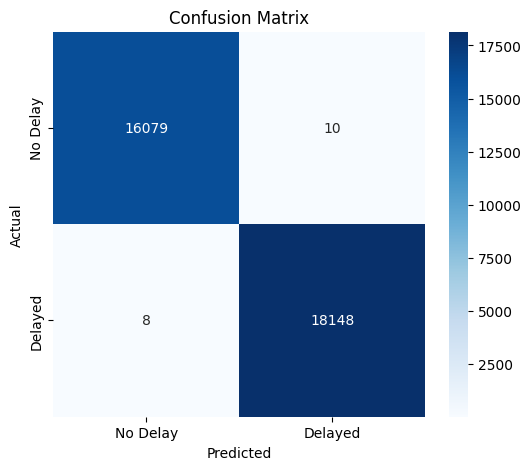

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delayed'], yticklabels=['No Delay', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

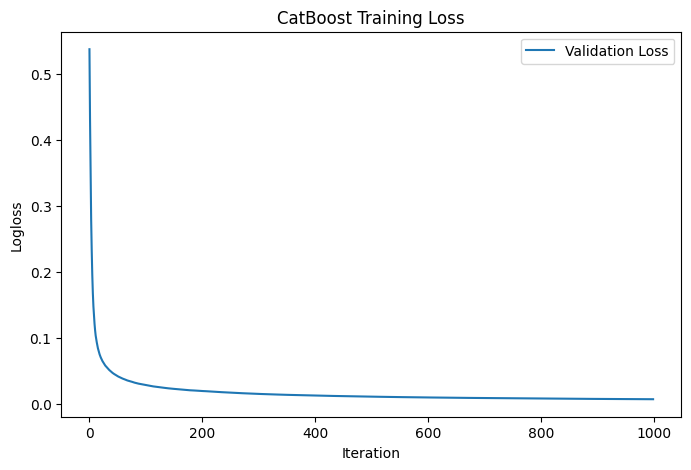

In [ ]:
# Plot Training Loss (Logloss)
plt.figure(figsize=(8, 5))
plt.plot(model.get_evals_result()['validation']['Logloss'], label="Validation Loss")
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('CatBoost Training Loss')
plt.legend()
plt.show()

In [ ]:
# Get Feature Importance
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

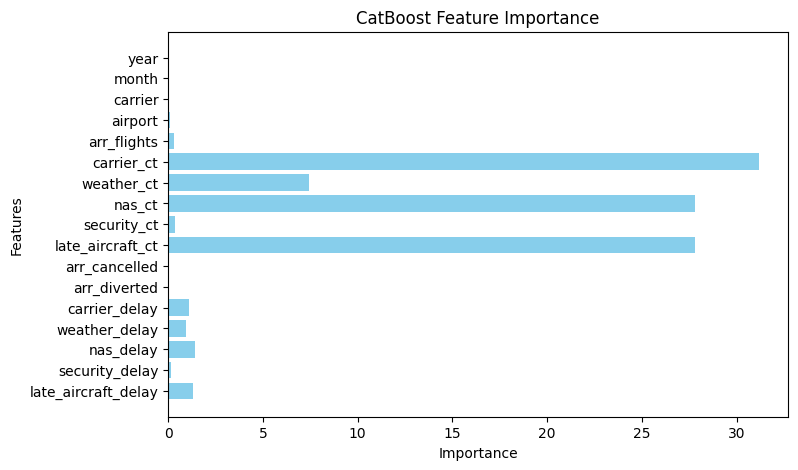

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # Flip the order to show the most important first
plt.show()